In [1]:
import xarray as xr 
import matplotlib.pyplot as plt

import numpy as np                 #for general calculations.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

#this command allows interactive plots in noteboks
%matplotlib inline   
from pathlib import Path

import sys
sys.path.append("pipeline")

from get_raw_data import raw_data
from get_full_data import full_data
from get_masked_data import masked_data
from get_ids import ids

import matplotlib.pyplot as plt
import imageio

{'satelliteName': 'ABI_G16-STAR-L2P-v2.70', 'startTime': '2018-01-01T00:00:00Z', 'endTime': '2018-03-01T00:00:00Z', 'tileSize': 64, 'tileStride': 32, 'spaceBounds': (1000, 2500, 1500, 3000), 'blockSize': 24, 'numBlocks': 57, 'windowSize': 5, 'randSeed': 100, 'batchSize': 32, 'trainLength': 20, 'valLength': 8, 'threshold': 0.2, 'dataDir': 'data', 'numTiles': 2025}


In [1]:
import datetime

In [3]:
start_time = "2018-01-01T00:00:00Z"
start_time = datetime.datetime.strptime(start_time, "%Y-%m-%dT%H:%M:%SZ")

In [4]:
print(start_time)

2018-01-01 00:00:00


In [5]:
end_time = "2018-03-01T00:00:00Z"
end_time = datetime.datetime.strptime(end_time, "%Y-%m-%dT%H:%M:%SZ")

In [6]:
print(end_time - start_time)

59 days, 0:00:00


In [11]:
print((end_time - start_time).days * 24)

1416


In [44]:
tile_num = 33
block_num = 49

In [3]:
full_stats = np.load('data/full_stats.npy')
masked_stats = np.load('data/masked_stats.npy')

In [21]:
print(full_stats.shape)

(2025, 57, 3)


In [31]:
max_ind = (np.argmax(masked_stats[:, :, 2]))

87773


In [4]:
ratios = masked_stats[:, :, 2] / (24 * 64 * 64)
print(np.nonzero(np.multiply(ratios > 0.5, ratios < 0.6)))

(array([  33,   33,   33, ..., 2009, 2009, 2010]), array([49, 52, 53, ..., 39, 48, 51]))


In [43]:
print(ratios[33, 49])

0.5658365885416666


In [34]:
print(98304/(24*64*64))

1.0


In [ ]:
print(tile_maxes[89](

In [45]:
full_data = np.load('data/tile_data/tile{tile_num}_block{block_num}.npy'.format(tile_num = tile_num, block_num = block_num))

In [6]:
print(full_data.shape)

(24, 64, 64)


In [46]:
masked_data = np.load('data/masked_data/tile{tile_num}_block{block_num}.npy'.format(tile_num = tile_num, block_num = block_num))

In [8]:
print(masked_data.shape)

(24, 64, 64)


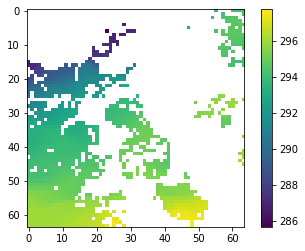

In [60]:
plt.imshow(masked_data[5, :, :])
plt.colorbar()

In [31]:
thing = np.logical_and(np.isnan(masked_data), ~np.isnan(full_data))
thing2 = ~np.isnan(masked_data) + 2 * thing

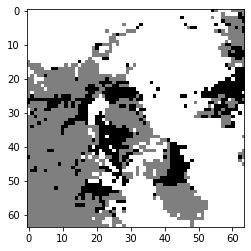

In [32]:
plt.imshow(thing2[5, :, :], cmap='binary')

In [22]:
print(full_data[:, :, 3].shape)

(24, 64)


In [11]:


def create_full_frame(t):
    plt.imshow(full_data[t, :, :])
    plt.colorbar()
    plt.title('Original SST in Tile 33 Block 49')
    plt.savefig(f'./img/full_{t}.png', transparent=False, facecolor='white')
    plt.close()
    # fig = plt.figure(figsize=(6, 6))    
    # plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    # plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    # plt.xlim([0,5])
    # plt.xlabel('x', fontsize = 14)
    # plt.ylim([0,5])
    # plt.ylabel('y', fontsize = 14)
    # plt.title(f'Relationship between x and y at step {t}',
    #           fontsize=14)    
    # plt.savefig(f'./img/img_{t}.png', 
    #             transparent = False,  
    #             facecolor = 'white'
    #            )    
    # plt.close()
    
def create_masked_frame(t):
    plt.imshow(masked_data[t, :, :])
    plt.colorbar()
    plt.title('Masked SST in Tile 33 Block 49')
    plt.savefig(f'./img/masked_{t}.png', transparent=False, facecolor='white')
    plt.close()
    # fig = plt.figure(figsize=(6, 6))    
    # plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    # plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    # plt.xlim([0,5])
    # plt.xlabel('x', fontsize = 14)
    # plt.ylim([0,5])
    # plt.ylabel('y', fontsize = 14)
    # plt.title(f'Relationship between x and y at step {t}',
    #           fontsize=14)    
    # plt.savefig(f'./img/img_{t}.png', 
    #             transparent = False,  
    #             facecolor = 'white'
    #            )    
    # plt.close()
    
def create_mask_frame(t):
    plt.imshow(thing2[t, :, :], cmap='binary')
    plt.colorbar()
    plt.title('Mask in Tile 33 Block 49')
    plt.savefig(f'./img/mask_{t}.png', transparent=False, facecolor='white')
    plt.close()
    # fig = plt.figure(figsize=(6, 6))    
    # plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    # plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    # plt.xlim([0,5])
    # plt.xlabel('x', fontsize = 14)
    # plt.ylim([0,5])
    # plt.ylabel('y', fontsize = 14)
    # plt.title(f'Relationship between x and y at step {t}',
    #           fontsize=14)    
    # plt.savefig(f'./img/img_{t}.png', 
    #             transparent = False,  
    #             facecolor = 'white'
    #            )    
    # plt.close()

for t in range(24):
    create_full_frame(t)
    create_masked_frame(t)
    create_mask_frame(t)
    


TypeError: 'function' object is not subscriptable

In [34]:
frames = []
for t in range(24):
    image = imageio.v2.imread(f'./img/full_{t}.png')
    frames.append(image)

In [35]:
imageio.mimsave('./img/full.gif', # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second

In [36]:
frames = []
for t in range(24):
    image = imageio.v2.imread(f'./img/masked_{t}.png')
    frames.append(image)
    
imageio.mimsave('./img/masked.gif', # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second

In [37]:
frames = []
for t in range(24):
    image = imageio.v2.imread(f'./img/mask_{t}.png')
    frames.append(image)
imageio.mimsave('./img/mask.gif', # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second

In [68]:

import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib notebook  


fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)  

def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos)  


ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()


writer = PillowWriter(fps=25)  
ani.save("demo_sine.gif", writer=writer)  


<IPython.core.display.Javascript object>

In [6]:
print(masked_stats.shape)

(2025, 57, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


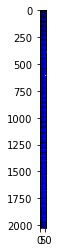

In [5]:
plt.imshow(masked_stats, cmap='binary')

In [7]:
masked_ratios = masked_stats[:, :, 2] / (24 * 64 * 64)


In [8]:
masked_ratios = np.reshape(masked_ratios, (45, 45, 57))

In [13]:
def create_tiles_frame(t):
    plt.imshow(masked_ratios[:, :, t], cmap='binary')
    plt.colorbar()
    plt.title('Cloud concentrations of tiles')
    plt.savefig(f'./img/tiles_{t}.png', transparent=False, facecolor='white')
    plt.close()
    # fig = plt.figure(figsize=(6, 6))    
    # plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    # plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    # plt.xlim([0,5])
    # plt.xlabel('x', fontsize = 14)
    # plt.ylim([0,5])
    # plt.ylabel('y', fontsize = 14)
    # plt.title(f'Relationship between x and y at step {t}',
    #           fontsize=14)    
    # plt.savefig(f'./img/img_{t}.png', 
    #             transparent = False,  
    #             facecolor = 'white'
    #            )    
    # plt.close()

for t in range(57):
    create_tiles_frame(t)
frames = []
for t in range(57):
    image = imageio.v2.imread(f'./img/tiles_{t}.png')
    frames.append(image)
imageio.mimsave('./img/tiles.gif', # output gif
                frames,          # array of input frames
                fps = 5)         # optional: frames per second
    